<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/ML_with_Python_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install scikit-learn

In [0]:
# LINEAR REGRESSION

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [0]:
# describe only evaluates the summary statistics for the numerical columns and doesnt display non-num ones.

In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

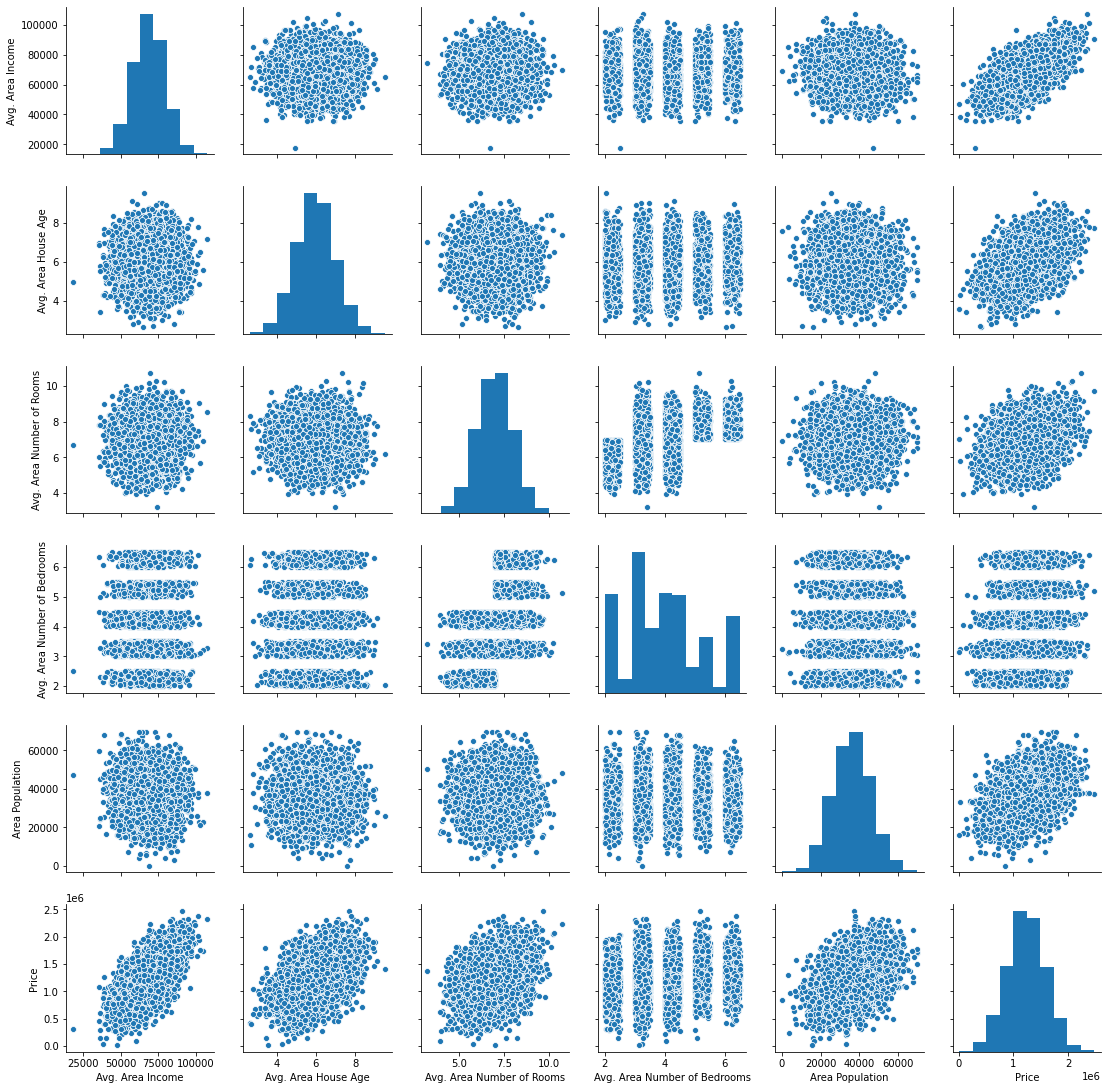

In [12]:
sns.pairplot(df)

In [0]:
#OBSERVATIONS-
#1. Histograms - everything is more or less normally distributed except for the avg no of bedrooms. 
#2. No. of bedrooms ka scatter plot is discontinuous because we cannot have non integer bedrooms.


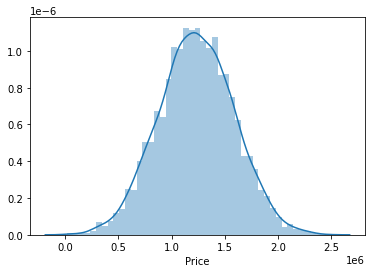

In [14]:
# Always plot the distribution plot of the Target column. Here - Price of house is our target. 
sns.distplot(df['Price'])

In [0]:
# From here we can see that the average price is around 1-1.5 millions

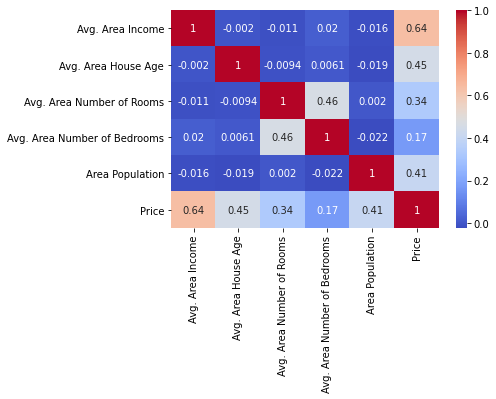

In [19]:
# let's do a heat map for correlation between each column. 
dc = df.corr()
sns.heatmap(dc,annot = True,cmap='coolwarm')
# Great correlation(orange) between Avg. Area Income & House Prices - Brilliant marketing around rich folks. 
# Good correlation b/w Avg no. of bedrooms v/s price - obvious. 

In [0]:
# Now let's use scikit learn in training a linear regression model
# Split the data into X array - Features to train on & y array - target variable
# here our target variable is the Price column and hence is the y-array.
# (Regression cannot handle text, NLP can. later in the course, so we dropping address column here)

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [0]:
# STEP 1 - Get your X and y data :-
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']] #all these are my features

In [0]:
y = df['Price']

In [0]:
# STEP 2 - Now that you have your X and y data, do train-test-split. 
# we want to split our data into 1. Training set - to teach/train our model.
#                                2. Test set - To test our model. 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
# test size = 0.4 means allocate 40% of my dataset to the test data set.
# random = 101, can be any number. Different nums offer different random splits. 

In [0]:
# STEP 3 - TRAIN YOUR MODEL :-
# Now that we have our training and testing data as X_train, X_test, y_train, y_test.
# its time to train our model.

In [34]:
from sklearn.linear_model import LinearRegression
# now create a linearRegression instance/object
lm = LinearRegression()
# we use the .fit() method on this object to train model on training data. 
lm.fit(X_train,y_train)
# Note that we're not assigning it to any other object/variable,
# because this is like changing the linear reg object 'lm' itself, inplace.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# This above output tells me that my linear regression model has been trained. 
# STEP 4 - EVALUATE the model, interpret the coefficients. 

In [36]:
# let's print the line's intercept. lm.intercept_
print(lm.intercept_)

-2640159.796853739


In [38]:
# the coefficients relate to the weightage of each feature. 
print(lm.coef_)
# this returns the coef for each feature. 
# array data type (see no commas)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [39]:
X.columns # to see which coef belongs to whom. 

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [43]:
cdf = pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficients'])
#coefficient data frame.
cdf

,Coefficients
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [0]:
# note- practice on sklearn's inbuilt boston dataset
# from sklearn.datasets import load_boston
# boston = load_boston() -- is a dictionary.

In [0]:
# PART 2 of ANALYSIS - PREDICTIONS!

In [0]:
y_predictions = lm.predict(X_test)

In [50]:
y_predictions
# this array constitutes of the predicted price of our house. That is,
# The value of prices that the model predicts

array([1260960.70567629,  827588.75560301, 1742421.24254363, ...,
        372191.40626868, 1365217.15140901, 1914519.54178955])

In [48]:
# Now we already know that y_test contains the correct prices of the houses. 
y_test #(which can also be called the y_true)

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

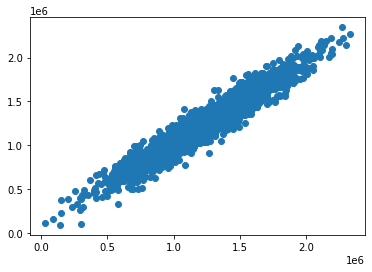

In [52]:
# now we want to check how far off are the y_test and y_predictions
#visual comparison b/w both-
plt.scatter(y_test,y_predictions)
#can clearly see how well theyre related. y=x type, almost. 

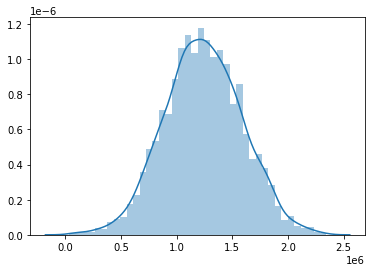

In [54]:
# Note, we can plot the distribution plot of residuals. 
# IF NORMAL BELL SHAPE - then our model choice was Great. 
# else if not normal distribution, then our choice of model 
# wasn't good. 
sns.distplot((y_test,y_predictions))
# HEnce we can clearly say that this proves regression was a good choice for modelling the current situation.

In [0]:
# REGRESSION EVALUATION metrics - 
# 1. Mean absolute error = |yt-yp|/n
# 2. Mean squared error = (yt-yp)2 / n
# 3. RMS error = root((yt-yp)2 / n)

In [0]:
from sklearn import metrics

In [58]:
metrics.mean_absolute_error(y_test,y_predictions)

82288.22251914928

In [59]:
metrics.mean_squared_error(y_test,y_predictions)

10460958907.208244

In [60]:
# rms is easy
np.sqrt(metrics.mean_squared_error(y_test,y_predictions))

102278.82922290538